In [1]:
import numpy as np
import pandas as pd
#import the data
df=pd.read_csv("C:\\Users\\biplo\\Desktop\Practicum 1\\Shooting.csv")
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [4]:
#group data by day
df['date']=pd.to_datetime(df['date'],infer_datetime_format=True) 
df_count=df.groupby("date")["id"].count() #get the count per day
df_count=df_count.to_frame() # convert results to a data frame
df_count.rename(columns = {'id':'Count'}, inplace = True) #rename column
df_count.head(10)


,Count
date,
2015-01-02,2
2015-01-03,1
2015-01-04,3
2015-01-05,1
2015-01-06,4
2015-01-07,4
2015-01-08,4
2015-01-09,2
2015-01-11,3


In [6]:
# the data needs to be in ds and y format for Prophet
from prophet import Prophet
df_count['ds']=df_count.index # add ds column as ds to meet Prophet format
df_count['y']=df_count['Count'] # add y column as ds to meet Prophet format
data=df_count[['ds','y']] # make a new dataframe with ds and y columns
data.head(10)

,ds,y
date,,
2015-01-02,2015-01-02,2
2015-01-03,2015-01-03,1
2015-01-04,2015-01-04,3
2015-01-05,2015-01-05,1
2015-01-06,2015-01-06,4
2015-01-07,2015-01-07,4
2015-01-08,2015-01-08,4
2015-01-09,2015-01-09,2
2015-01-11,2015-01-11,3


In [7]:
#prophet does the modeling and fitting once the data is provided in ds and y format
m = Prophet()
m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
m.params

{'k': array([[0.00183106]]),
 'm': array([[0.32249568]]),
 'delta': array([[-4.99255937e-09, -3.65196991e-09, -3.10619475e-08,
          4.13648448e-08,  6.05551680e-10, -2.54882269e-08,
         -6.18603845e-09,  1.80574091e-08,  2.13820416e-08,
          2.19764410e-08,  1.12359661e-08, -6.95572756e-06,
         -3.38033775e-05, -1.10340681e-04, -4.57736862e-05,
         -3.00125747e-03, -2.02454715e-03, -2.93324974e-05,
         -9.11596237e-04, -5.33571333e-04, -3.82310110e-04,
         -3.77595359e-03, -1.69151547e-03, -4.10937619e-05,
         -6.86998024e-05]]),
 'sigma_obs': array([[0.17311788]]),
 'beta': array([[ 8.44238419e-03,  8.65892389e-03, -9.73002172e-04,
          3.59924306e-03,  6.79344425e-04, -1.24455407e-02,
          8.92297787e-03,  5.64659890e-03,  5.76780452e-03,
          9.78457366e-03, -5.98368461e-03,  3.84289607e-03,
         -1.52331590e-04, -5.53633272e-03, -7.74183971e-03,
          4.04894270e-03,  7.00814055e-05, -2.48647656e-03,
          9.9249344

In [9]:
future_data = m.make_future_dataframe(periods=365)
future_data

,ds
0,2015-01-02
1,2015-01-03
2,2015-01-04
3,2015-01-05
4,2015-01-06
...,...
2614,2022-08-28
2615,2022-08-29
2616,2022-08-30
2617,2022-08-31


In [10]:
#forecasting the future data
forecast = m.predict(future_data)
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [11]:
#getting the tail of forecasted data
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2614,2022-08-28,2.470038,0.519612,4.394758
2615,2022-08-29,2.364555,0.314296,4.318989
2616,2022-08-30,2.649878,0.620112,4.600511
2617,2022-08-31,2.578251,0.605822,4.443585
2618,2022-09-01,2.620748,0.696525,4.588275


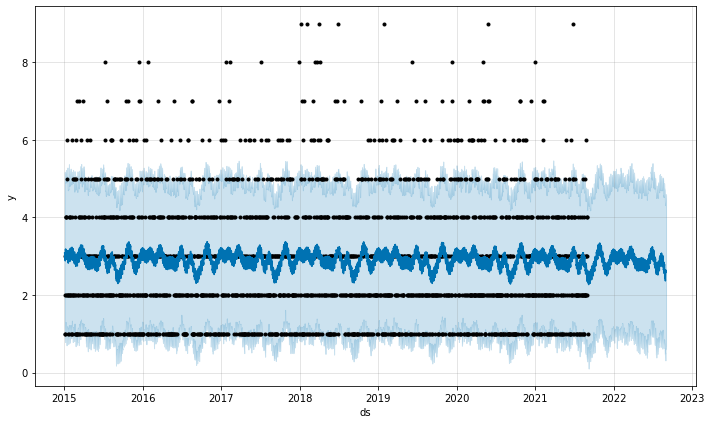

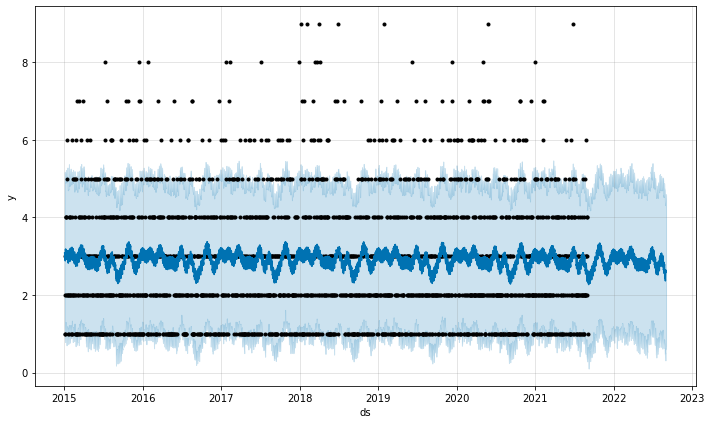

In [12]:
#plotting the forecast
m.plot(forecast)

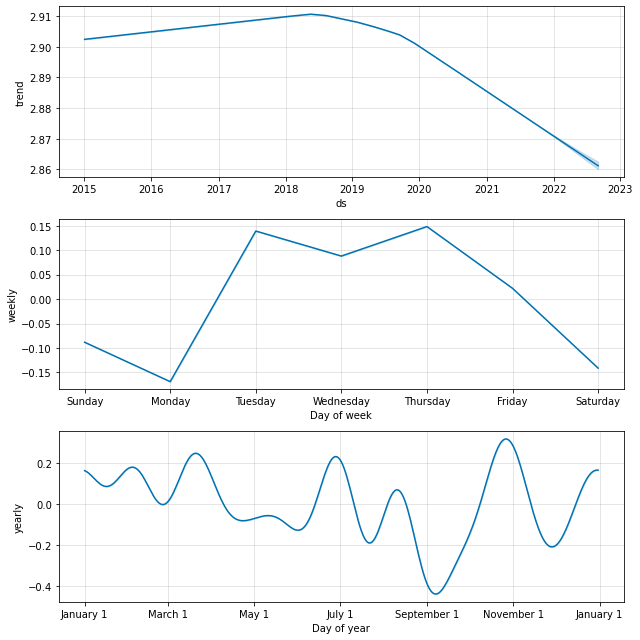

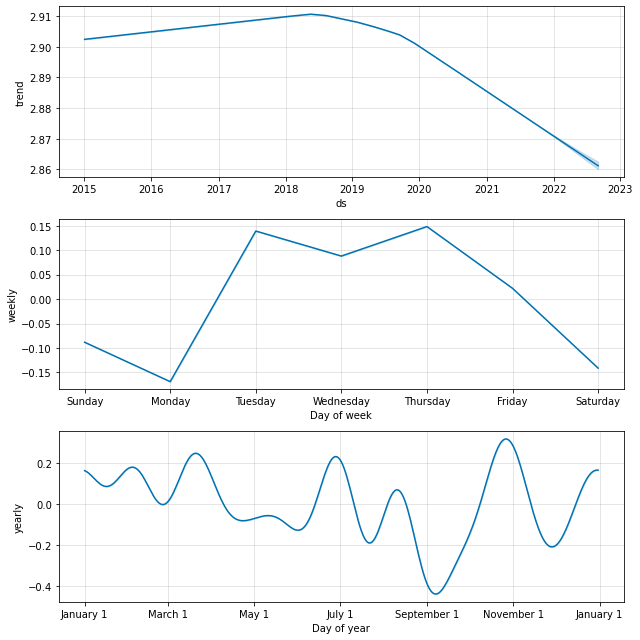

In [11]:
m.plot_components(forecast)

In [15]:
##using plotly to make interactive visualization
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)


In [14]:
plot_components_plotly(m, forecast)